<a href="https://colab.research.google.com/github/jermwatt/machine_learning_refined/blob/main/notes/3_First_order_methods/3_2_First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 3: First order methods

# The First-Order Optimality Condition

In this Section we discuss the foundational first order concept on which many practical optimization algorithms are built: the first order optimality condition.  The first order analog of the zero order condition discussed in the previous Chapter, the first order condition codifies the consistent behavior of how any differentiable function's first derivative(s) behave at its minima.  While there are a few important instances when this tool can be used to directly determine the minima of a function (which we review here), in and of itself the first order optimality condition is more broadly useful because it helps its formal characterization of minimum points serves helps motivate the construction of both first and second order optimization algorithms.

In [ ]:
# import standard libs
import os

# if on collab pull required subdirectories
if os.getenv("COLAB_RELEASE_TAG"): 
    # install github clone - allows for easy cloning of subdirectories
    !pip install github-clone
    from pathlib import Path 

    # clone library subdirectory
    if not Path('chapter_3_library').is_dir():
        !ghclone https://github.com/jermwatt/machine_learning_refined/tree/main/notes/3_First_order_methods/chapter_3_library
    else:
        print('chapter_3_library already cloned!')

# append path for local library, data, and image import
import sys
sys.path.append('./chapter_3_library')

# import section helper
import section_3_2_helpers
plotter = section_3_2_helpers.Visualizer()

# standard imports
import matplotlib.pyplot as plt
import copy

# import autograd-wrapped numpy
import autograd.numpy as np

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

##  The first order condition

In the next Python cell we plot a quadratic functions in two and three dimensions, and mark the global minimum point on each with a green point.  In each panel we also draw the first order Taylor series approximation - a tangent line/hyperplane - generated by the first derivative(s) at the function's minimum value (see Appendix Chapter A for further details on Taylor series approximations).  In terms of the behavior of the first order derivatives here we see - in both instances - that the tangent line/hyperplane is perfectly flat, indicating that the first derivative(s) is exactly zero at the function's minimum.  

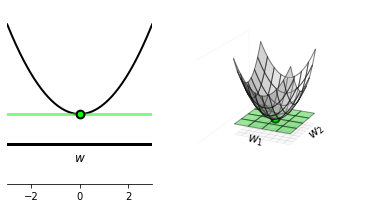

In [2]:
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: w**2  + 3
func2 = lambda w: w[0]**2 + w[1]**2  + 3

# use custom plotter to show both functions
section_3_2_helpers.compare_2d3d(func1 = func1,func2 = func2)

This sort of first order behavior is universal regardless of the function one examines and - moreover - it holds regardless of the dimension of a function's input: first order derivatives are always zero at the minima of a function.  This is because minimum values of a function are naturally located at 'valley floors' where a tangent line or hyperplane tangent to the function is perfectly flat, and thus has zero-valued slope(s).

Because the derivative/gradient at a point gives precisely this slope information, the value of first order derivatives provide a convenient way of *characterizing* minimum values of a function $g$. When $N=1$ any point $v$ where 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}g\left(v\right)=0
\end{equation}

is a potential minimum. Analogously with general $N$ dimensional input, any $N$ dimensional point $\mathbf{v}$ where *every* partial derivative of $g$ is zero, that is

\begin{equation}
\begin{array}
\
\frac{\partial}{\partial w_{1}}g(\mathbf{v})=0\\
\frac{\partial}{\partial w_{2}}g(\mathbf{v})=0\\
\,\,\,\,\,\,\,\,\,\,\vdots \\
\frac{\partial}{\partial w_{N}}g(\mathbf{v})=0
\end{array}
\end{equation}

is a potential minimum. This system of $N$ equations is naturally referred to as the *first order system of equations*.  We can write the first order system more compactly using gradient notation as 

\begin{equation}
\nabla g\left(\mathbf{v}\right)=\mathbf{0}_{N\times1}.
\end{equation}

This is a very useful characterization of minimum points because - at least in principle - it gives us a concrete alternative to seeking out a function's minimum points directly via some zero-order approach: by solving a function's first order system of equations.

> The first order optimality condition translates the problem of identifying a function's minimum points into the task of solving a system of $N$ first order equations.

There are however two problems with the first order characterization of minima.  First off, with few exceptions (including some important examples we detail in the next Subsection), it is virtually impossible to solve a general function's first order systems of equations 'by hand'.   That is, to solve such equations algebraically for 'closed form' solutions one can write out on paper.  This is where the local first and second order optimization methods we discuss in the current and subsequent Chapters come in - they are iterative ways of solving such a system.  

The other problem is that the *first order optimality condition* does not only define minima of a function, but other points as well.  The first order condition also equally characterizes *maxima* and *saddle points* of a function -  as we see in a few simple examples below.

#### <span style="color:#a50e3e;">Example 1:</span> Finding points of zero derivative for single-input functions graphically

In the next Python cell we plot the three functions

\begin{equation}
\begin{array}
\
g(w) = \text{sin}\left(2w\right) \\
g(w) = w^3 \\
g(w) = \text{sin}\left(3w\right) + 0.1w^2
\end{array}
\end{equation}


in the top row of the figure. For each we mark all the zero derivative points in green and draw the first order Taylor series approximations/tangent lines there in green as well. Below each function we plot its first derivative, highlighting the points where it takes on the value zero as well (the horizontal axis in each case is drawn as a horizontal dashed black line). 

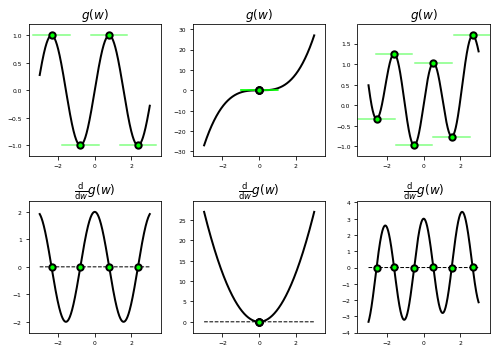

In [3]:
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: np.sin(2*w)
func2 = lambda w: w**3
func3 = lambda w: np.sin(3*w) + 0.1*w**2

# use custom plotter to show both functions
section_3_2_helpers.show_stationary(func1 = func1,func2 = func2,func3 = func3)

Examining these plots we can see that it is not only *global* minima that have zero derivatives, but a variety of other points as well. These consist of 

- *local minima* or points that are the smallest with respect to their immediate neighbors, like the one around the input value $w=2$ in the right panel


- *local and global maxima* or points that are the largest with respect to their immediate neighbors, like the one around the input value $w=-2$ in the right panel


- *saddle points* like the one shown in the middle panel, that are neither maximal nor minimal with respect to their immediate neighbors

---

The previous example illustrate the full swath of points having zero-valued derivative(s) - and this includes multi-input functions as well *regardless of dimension*.  Taken together all such points are collectively referred to as *stationary points* or *critical points*.

> Together local/global minima and maxima, as well as saddle points are referred to as *stationary points*.  These are points at which a function's derivative(s) take on zero value, i.e., $\nabla g(\mathbf{w}) = \mathbf{0}_{N\times 1}$.

So - while imperfect in terms of the points it characterizes - this *first order condition for optimality* does characterize points of a function that include a function's global minima.  Moreover the first order condition allows us to translate the problem of finding global minima to the problem of solving a system of (typically nonlinear) equations, for which many algorithmic schemes have been designed.

> **The first order condition for optimality**: Stationary points of a function $g$ (including minima, maxima, and
saddle points) satisfy the first order condition $\nabla g\left(\mathbf{v}\right)=\mathbf{0}_{N\times1}$.  This allows us to translate the problem of finding global minima to the problem of solving a system of (typically nonlinear) equations, for which many algorithmic schemes have been designed.

Note: if a function is *convex* - as with the quadratic function's shown in the beginning of this Subsection - then any point of such a function satisfying the first order condition must be a global minima, as a convex function has no maxima or saddle points.

##  Special cases where the first order system can be solved 'by hand'

In principle the benefit of using the first order condition is that it allows us to transform the task of seeking out global minima to that of solving a system of equations, for which a wide range of algorithmic methods have been designed. The emphasis here on *algorithmic* schemes is key, as solving a system of equations *by hand* is generally speaking very difficult (if not impossible).  Again we emphasize, the vast majority of (nonlinear) systems of equations cannot reasonably be solved by hand.

However there are a handful of relatively simple but important examples where one can compute the solution to a first order system by hand, or at least one can show algebraically that they reduce to a *linear system of equations* which can be easily solved numerically.  By far the most important of these are the multi-input quadratic function and the highly related *Rayleigh quotient*, which we discuss below.  We will see the former later on when discussing linear regression, and the latter in a number of instances where we use it as a tool for studying the properties of certain machine learning cost functions.  

#### <span style="color:#a50e3e;">Example 2:</span> Calculating stationary points of some single-input functions algebraically

In this Example we use the first order condition for optimality to compute stationary points of the functions 

\begin{equation}
\begin{array}\\
g\left(w\right)=w^{3} \\
g\left(w\right)=e^{w} \\
g\left(w\right)=\textrm{sin}\left(w\right)\\
g\left(w\right)=a + bw + cw^{2}, \,\,\,c>0 \\
\end{array}
\end{equation}

and will distinguish the kind of stationary point visually for these instances.

- $g\left(w\right)=w^{3}$, plotted in the middle panel of the second figure above, the first order condition gives $g'\left(v\right)=3v^{2}=0$ which we can visually identify as a saddle point at $v=0$.


- $g\left(w\right)=e^{w}$, the first order condition gives $g'\left(v\right)=e^{v}=0$ which is only satisfied as $v$ goes to $-\infty$, giving a minimum.


- $g\left(w\right)=\mbox{sin}\left(w\right)$ the first order condition gives stationary points wherever $g'\left(v\right)=\mbox{cos}\left(v\right)=0$
which occurs at odd integer multiples of $\frac{\pi}{2}$, i.e., maxima at $v=\frac{\left(4k+1\right)\pi}{2}$ and minima at $v=\frac{\left(4k+3\right)\pi}{2}$
where $k$ is any integer. 


- $g\left(w\right)=w^{2}$ for which the first order condition gives $g'\left(v\right)=2cv + b =0$ with a minimum
at $v=\frac{-b}{2c}$.

#### <span style="color:#a50e3e;">Example 3:</span> A simple looking function with difficult to compute (algebraically) global minimum

As mentioned previously the vast majority of functions - or to be more precise the system of equations derived from functions - cannot be solved by hand algebraically.  To get a sense of this challenge here we show an example of a simple-enough looking function whose global minimum is very cumbersome to compute by hand.  

Take the simple degree four polynomial

\begin{equation}
g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w\right)
\end{equation}

which is plotted over a short range of inputs containing its global minimum in the next Python cell.

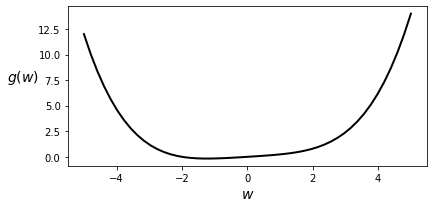

In [4]:
# specify range of input for our function
w = np.linspace(-5,5,50)
g = lambda w: 1/50*(w**4 + w**2 + 10*w)

# plot
figure = plt.figure(figsize=(6,3))
plt.plot(w,g(w),linewidth=2,color='k')
plt.xlabel('$w$',fontsize=14)
plt.ylabel('$g(w)$',rotation=0,labelpad=15,fontsize=14)
plt.show()

The first order system here can be easily computed as 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d} w}g(w) = \frac{1}{50}\left(4w^3 + 2w + 10\right) = 0
\end{equation}

which simplifies to

\begin{equation}
2w^3 + w + 5 = 0
\end{equation}

This has three possible solutions, but the one providing the minimum of the function $g(w)$ is 

\begin{equation}
w = \frac{\sqrt[\leftroot{-2}\uproot{2}3]{\sqrt[\leftroot{-2}\uproot{2}]{2031} - 45}}{6^{\frac{2}{3}}} - \frac{1}{\sqrt[\leftroot{-2}\uproot{2}3]{6\left(\sqrt{2031}-45\right)}}
\end{equation}

which can be computed - after much toil - using [centuries old tricks developed for just such problems](http://mathworld.wolfram.com/CubicFormula.html). 

#### <span style="color:#a50e3e;">Example 4:</span> Stationary points of a general multi-input  quadratic function

Take the general multi-input quadratic function

\begin{equation}
g\left(\mathbf{w}\right)=a + \mathbf{b}^{T}\mathbf{w} + \mathbf{w}^{T}\mathbf{C}\mathbf{w}
\end{equation}

where $\mathbf{C}$ is an $N\times N$ symmetric matrix, $\mathbf{b}$ is an $N\times 1$ vector, and $a$ is a scalar.

Computing the first derivative (gradient) we have

\begin{equation}
\nabla g\left(\mathbf{w}\right)=2\mathbf{C}\mathbf{w}+\mathbf{b}
\end{equation}

Setting this equal to zero gives a *symmetric and linear* system of equations of the form

\begin{equation}
\mathbf{C}\mathbf{w}=-\frac{1}{2}\mathbf{b}
\end{equation}

whose solutions are stationary points of the original function.  Note here we have not explicitly solved for these stationary points, but have merely shown that the first order system of equations in this particular case is in fact one of the easiest to solve numerically.

##  Coordinate descent and the first order optimality condition

As we have seen thus far the first order optimality condition is a powerful way of characterizing the stationary points - and in particular the minima - of a function.  In particular it tells us that - for a given cost function $g\left(\mathbf{w}\right)$ taking in $N$ dimensional input - that the stationary points (minima included) of this function are those satisfying the system of equations

\begin{equation}
\nabla g\left(\mathbf{v}\right)=\mathbf{0}_{N\times1}
\end{equation}

or written out one equation at-a-time as

\begin{equation}
\begin{array}
\
\frac{\partial}{\partial w_{1}}g(\mathbf{v})=0\\
\frac{\partial}{\partial w_{2}}g(\mathbf{v})=0\\
\,\,\,\,\,\,\,\,\,\,\vdots \\
\frac{\partial}{\partial w_{N}}g(\mathbf{v})=0.
\end{array}
\end{equation}

If this set of equations can be solved (as it can be for the examples above) we can then potentially recover minimum points of $g$.   However we can rarely solve this system directly in practice 'by hand', and even when we can - e.g., when the set of equations is linear - we still need an algorithm to actually resolve the solution to such a system in a timely manner. 

However if we take a 'coordinate-wise' view of things, we can simplify the task of solving first order systems by solving just one of these equations (or - more generally - one batch of the equations) at a time resulting in a coordinate descent scheme.  This turns the often impossible task of solving a first order systems *simultaneously* into a coordinate-wise approach where we solve them *sequentially*.  That is, instead of trying to solve the system of equations all at once we solve each partial derivative equation

\begin{equation}
\frac{\partial}{\partial w_{n}}g(\mathbf{v})=0
\end{equation}

one at-a-time.  Hence this idea will be especially effective when each such equation of a first order system can be solved for in closed form.  

To perform coordinate descent using this idea we first initialize at an input point $\mathbf{w}^0$, and begin by updating the first coordinate

\begin{equation}
\frac{\partial}{\partial w_{1}}g\left(\mathbf{w}^0\right)=0 
\end{equation}

for the optimal first weight $w_1^{\star}$.  We then update the first coordinate of the vector $\mathbf{w}^0$ with this solution, and call the updated set of weights $\mathbf{w}^1$.  Continuing this pattern to update the $n^{th}$ weight we solve

\begin{equation}
\frac{\partial}{\partial w_{n}}g\left(\mathbf{w}^{n-1}\right)=0 
\end{equation}

for $w_n^{\star}$, and update the $n^{th}$ weight using this value forming the updated set of weights $\mathbf{w}^n$.  

After we sweep through all $N$ weights a single time we can refine our solution by sweeping through the weights again (as with any other coordinate wise method).  At the $k^{th}$ such sweep we update the $n^{th}$ weight by solving the single equation

\begin{equation}
\frac{\partial}{\partial w_{n}}g\left(\mathbf{w}^{k + n-1}\right)=0 
\end{equation}

and update the $n^{th}$ weight of $\mathbf{w}^{k + n-1}$, and so on.

#### <span style="color:#a50e3e;">Example 5:</span>  Minimizing convex quadratic functions via first order coordinate descent

In [8]:
def coordinate_descent_for_quadratic(g,w,max_its,a,b,C):
    '''
    Coordinate descent wrapper for general quadratic function. Here
    
    a - a constant
    b - an Nx1 vector
    C - an NxN matrix (symmetric and all nonnegative eigenvalues)
    '''
        
    # record weights and cost history 
    weight_history = [copy.deepcopy(w)]     
    cost_history = [g(w)]
    N = np.size(w)
    
    # outer loop - each is a sweep through every variable once
    for k in range(max_its):
        # inner loop - each is a single variable update
        for n in range(N):
            w[n] = -(np.dot(C[n,:],w) - C[n,n]*w[n] + 0.5*b[n])/float(C[n,n])
            
            # record weights and cost value at each step
            weight_history.append(copy.deepcopy(w))
            cost_history.append(g(w))

    return weight_history,cost_history

First we use this algorithm to minimize the simple quadratic 

\begin{equation}
g(w_0,w_1) = w_0^2 + w_1^2 + 2
\end{equation}

which can be written in vector-matrix where $a = 2$, $\mathbf{b} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$, and $\mathbf{C} = \begin{bmatrix} 1 \,\, 0 \\ 0 \,\, 1 \end{bmatrix}$.  We initialize at $\mathbf{w} = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$ and run $1$ iteration of the algorithm - that is all it takes to perfectly minimize the function.

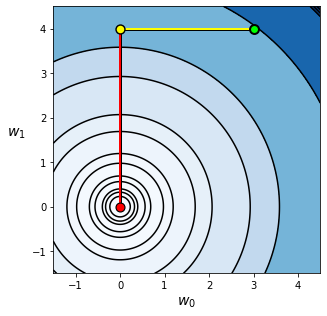

In [9]:
# define constants for a N=2 input quadratic
a = 2
b = np.zeros((2,1))
C = np.eye(2)

# a quadratic function defined using the constants above
g = lambda w: (a + np.dot(b.T,w) + np.dot(np.dot(w.T,C),w))[0]

# initialization
w = np.array([3,4])

# run your alternating descent code
max_its = 1
weight_history,cost_history = coordinate_descent_for_quadratic(g,w,max_its,a,b,C)

# show run in both three-dimensions and just the input space via the contour plot
plotter.two_input_contour_plot(g,weight_history,xmin = -1.5,xmax = 4.5,ymin = -1.5,ymax = 4.5,num_contours = 30,show_original = False)

Next we make a run of $2$ iterations of the method at the same initial point to completely minimize another convex quadratic with $a = 20$, $\mathbf{b} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$, and $\mathbf{C} = \begin{bmatrix} 2 \,\, 1 \\ 1 \,\, 2 \end{bmatrix}$. 

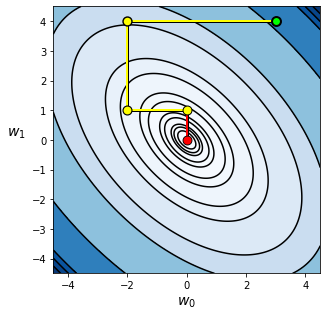

In [10]:
# define constants for a N=2 input quadratic
a = 20
b = np.zeros((2,1))
C = np.array([[2,1],[1,2]])

# a quadratic function defined using the constants above
g = lambda w: (a + np.dot(b.T,w) + np.dot(np.dot(w.T,C),w))[0]

# initialization
w = np.array([3,4])

# run your alternating descent code
max_its = 2
weight_history,cost_history = coordinate_descent_for_quadratic(g,w,max_its,a,b,C)

# show run in both three-dimensions and just the input space via the contour plot
plotter.two_input_contour_plot(g,weight_history,xmin = -4.5,xmax = 4.5,ymin = -4.5,ymax = 4.5,num_contours = 30,show_original = False)

#### <span style="color:#a50e3e;">Example 8:</span>  Solving systems symmetric equations

Note how in the previous example the first order system turned out to be *linear*.  More specifically, we ended up using coordinate descent to solve the linear system (re-arranging equation 

\begin{equation}
\mathbf{C}\mathbf{w} = - \frac{1}{2}\mathbf{b}.
\end{equation}

Here square symmetric $N \times N$ matrix $\mathbf{C}$ and the $N\times 1$ vector $\mathbf{b}$ came from an associated quadratic (and since that quadratic is assumed convex, $\mathbf{C}$ must be *positive semi-definite*, i.e., it must  have all nonnegative eigenvalues).  However, divorced from the concept of a quadratic we can think of coordinate descent in a broader context - as a method for solving more general linear systems of equations where the matrix $\mathbf{C}$ is positive semi-definite.  

Thus we can re-interpret the experiments performed in the previous example in just this way - as examples of coordinate descent applied to solving square linear systems of equations where the matrix $\mathbf{C}$ is positive semi-definite.